In [1]:
# %load main.py
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

from config import config
import mysql_utils as mysql
import preprocessing
import visualization

In [2]:
DATA_FREQUENCY = dt.timedelta(minutes=5)
SEASONAL_FREQUENCY = 12*24*7

In [3]:
# DETECTOR_DATA_TABLE = "detector_data_processed_2017"
DETECTOR_ID = "608219"
# DETECTOR_DATA_QUERY = "SELECT DetectorID, Year, Month, Day, Time, Volume, Occupancy\
#                         FROM {} AS DD NATURAL JOIN detector_health AS DH\
#                         WHERE DetectorID = {} AND Health = 1\
#                         ORDER BY Year, Month, Day, Time;".format(DETECTOR_DATA_TABLE, DETECTOR_ID)

In [4]:
flow = pd.read_csv("data/detector_{}_flow_original.csv".format(DETECTOR_ID), index_col=0, parse_dates=True)

In [ ]:
visualization.plot_data_over_time(flow, title="Detector {} Flow".format(DETECTOR_ID), ylabel="Flow", figsize=(20, 8))

In [ ]:
_, flow_stretch = preprocessing.get_longest_continuous_stretch_of_data(flow, DATA_FREQUENCY)

In [ ]:
visualization.plot_data_over_time(flow_stretch, title="Detector {} Flow, {} to {}"
                                  .format(DETECTOR_ID, flow_stretch.index[0], flow_stretch.index[-1]),
                                  ylabel="Flow", figsize=(20, 8))

In [5]:
break_length = preprocessing.get_longest_missing_data_stretch_length(flow, DATA_FREQUENCY)
print("Longest length of continuous missing data, in time units: {}".format(break_length))
print("Longest length of continuous missing data, in number of data: {}".format(break_length / DATA_FREQUENCY))

Longest length of continuous missing data, in time units: 10 days 00:00:00
Longest length of continuous missing data, in number of data: 2880.0


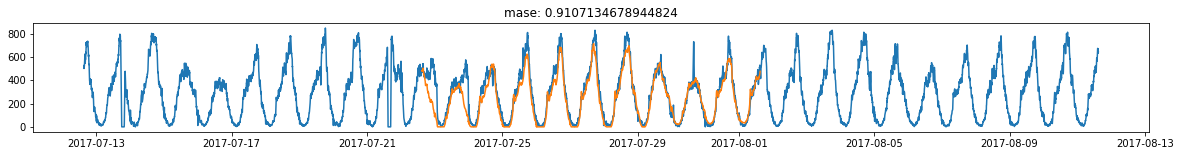

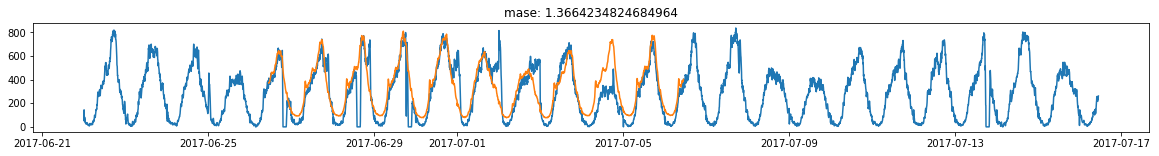

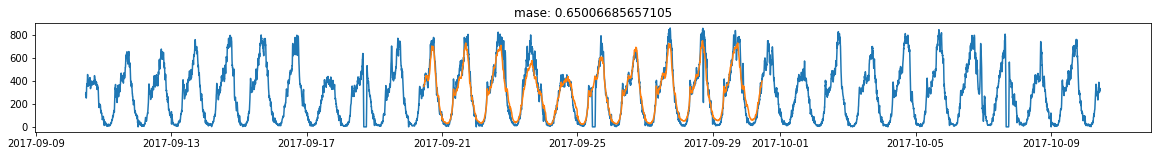

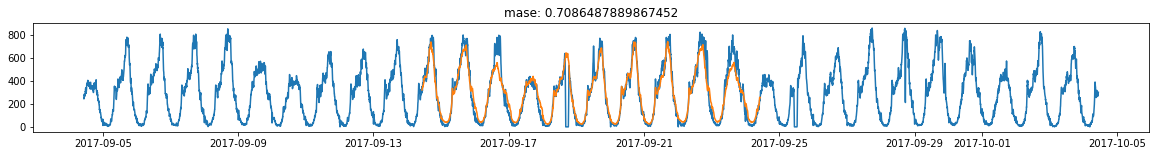

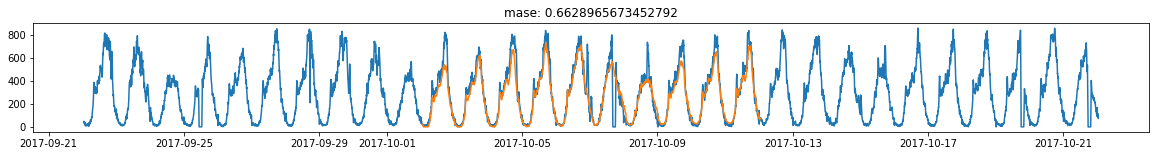

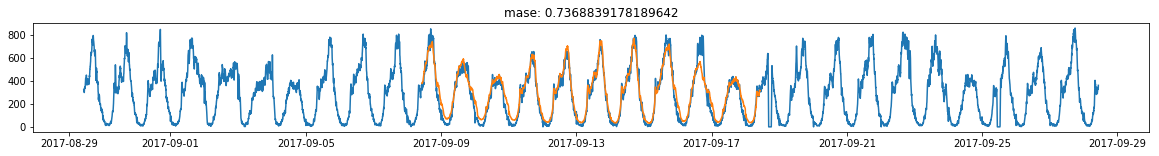

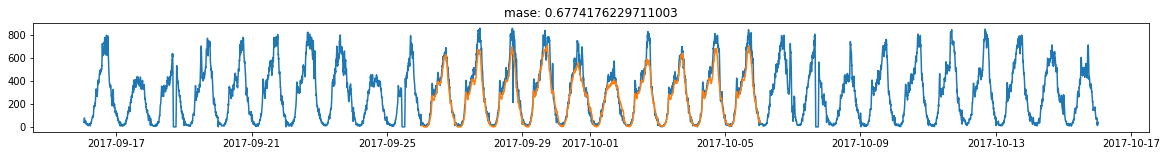

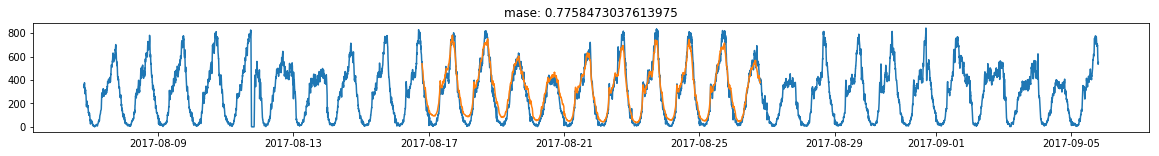

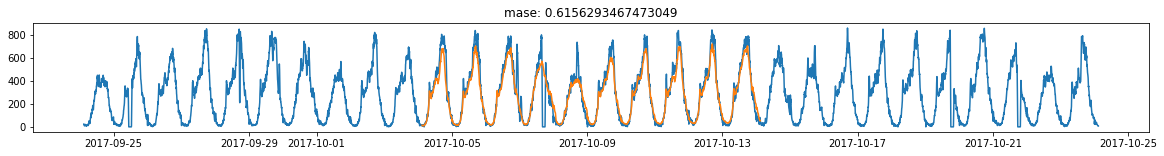

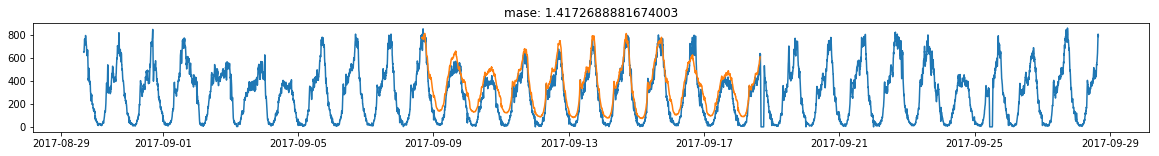

(0    0.85218
 dtype: float64, [0    0.910713
  dtype: float64, 0    1.366423
  dtype: float64, 0    0.650067
  dtype: float64, 0    0.708649
  dtype: float64, 0    0.662897
  dtype: float64, 0    0.736884
  dtype: float64, 0    0.677418
  dtype: float64, 0    0.775847
  dtype: float64, 0    0.615629
  dtype: float64, 0    1.417269
  dtype: float64])

In [5]:
preprocessing.test_imputation(flow, DATA_FREQUENCY, SEASONAL_FREQUENCY,
                              preprocessing.seasonal_decomposition_linear_interpolation_imputation,
                              imputation_params={'lower_bound': 0}, k=10,
                              error="mase", error_params={"seasonal_freq": 12},
                              graph=True, figsize=(20, 2), graph_zoom=True)